In [1]:
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2]:
X = dataset[['CreditScore', 'Age' , 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

geo = pd.get_dummies(dataset['Geography'], drop_first=True)
gender = pd.get_dummies(dataset['Gender'], drop_first=True)

#to save it from dummy variables trap, we always drop one column

X = pd.concat([X, geo, gender], axis=1)

In [3]:
y = dataset[['Exited']]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [6]:
X_train.shape

(8000, 11)

In [7]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.
/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ankit/opt/anaconda3/lib/python3.7/sit

In [8]:
from keras.layers import Dense

In [9]:
#first layer: Hidden layer

#input_dim = 11 (means 11 features in my X variable)

model.add(Dense(units=16, activation = 'relu', input_dim=11, kernel_initializer='zeros', bias_initializer='zeros'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                192       
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.get_layer('dense_1').get_weights()

#11*16 weights

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)]

In [12]:
model.add(Dense(units=16, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
Total params: 464
Trainable params: 464
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(units=6, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
Total params: 566
Trainable params: 566
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(units=16, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________


In [16]:
#last layer will always have sigmoid function
#sigmoid function -  works best for binary classification (0 & 1)
from keras.optimizers import Adam

model.add(Dense(units=1, activation='sigmoid', kernel_initializer = 'glorot_uniform'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 566
Trainable params: 566
Non-trainable params: 0
_________________________________________________________________


/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [18]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.1))

#learning_rate => hyperparameter

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
model.fit(X_train, y_train, epochs=20)


Epoch 1/20
8000/8000 [==============================] - 1s 139us/step - loss: 0.5139
Epoch 2/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.5080
Epoch 3/20
8000/8000 [==============================] - 1s 66us/step - loss: 0.5092
Epoch 4/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.5087
Epoch 5/20
8000/8000 [==============================] - 0s 46us/step - loss: 0.5086
Epoch 6/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.5092
Epoch 7/20
8000/8000 [==============================] - 0s 48us/step - loss: 0.5087
Epoch 8/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.5087
Epoch 9/20
8000/8000 [==============================] - 0s 48us/step - loss: 0.5085
Epoch 10/20
8000/8000 [==============================] - 0s 48us/step - loss: 0.5097
Epoch 11/20
8000/8000 [==============================] - 0s 48us/step - loss: 0.5091
Epoch 12/20
8000/8000 [==============================] - 0s 58us/step - 

In [20]:
model.history.history
#shows all the loss values

{'loss': [0.5139026687741279,
  0.5080250099897384,
  0.5092237786054611,
  0.508693533539772,
  0.5085731959342956,
  0.5091722216010094,
  0.5087122716903687,
  0.5086670176386833,
  0.508528707742691,
  0.5097396908402443,
  0.5090584112405777,
  0.5097346445322036,
  0.5079276552200317,
  0.508245199918747,
  0.5093292731046677,
  0.5097895427942276,
  0.5084759360551834,
  0.5089394090175628,
  0.5082143739461898,
  0.5091587896347046]}

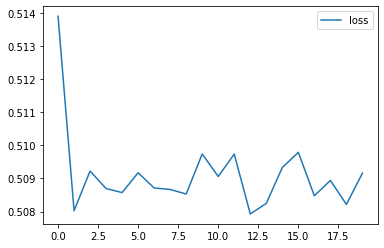

In [21]:
l = pd.DataFrame(model.history.history)
l.plot()